In [1]:
from camelot import read_pdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
fhandle=read_pdf("resources/pdf/SomeBasicConceptsOfChemistry(Responses)2.pdf",pages='all')

In [19]:
page=[]
for n in fhandle:
    y=n.df
    y.drop(0,inplace=True)
    page.append(y)
    
d=pd.concat(page,ignore_index=True)
d.head()

,0,1,2,3
0,,9 / 10 Thrusha.S.Shetty,2nd PUC,PCMB
1,,9 / 10 Pratheek,1st PUC,PCMB
2,,7 / 10 Charan. K,1st PUC,PCM
3,,3 / 10 Preetam,2nd PUC,PCMB
4,,5 / 10 Shravan Kumar,1st PUC,PCM


In [20]:
d.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [23]:
d.columns=["Score(10)","Name","Class","Combination"]
d.head(1)

,Score(10),Name,Class,Combination
0,,9 / 10 Thrusha.S.Shetty,2nd PUC,PCMB


In [24]:
d[d["Name"]==""]

,Score(10),Name,Class,Combination
34,4 / 10 Anil,,2nd PUC,PCM
66,6 / 10 Arya,,1st PUC,PCM
68,7 / 10 Diya,,1st PUC,PCMB
122,1 / 10 rahul,,1st PUC,PCM
126,3 / 10 Vinit,,1st PUC,PCM
186,6 / 10 Vipul,,1st PUC,PCM


In [25]:
d.iloc[[34,66,68,122,126,186]]

,Score(10),Name,Class,Combination
34,4 / 10 Anil,,2nd PUC,PCM
66,6 / 10 Arya,,1st PUC,PCM
68,7 / 10 Diya,,1st PUC,PCMB
122,1 / 10 rahul,,1st PUC,PCM
126,3 / 10 Vinit,,1st PUC,PCM
186,6 / 10 Vipul,,1st PUC,PCM


In [30]:
df2=d.copy()

In [31]:
df2.Name[df2.Name=='']=df2['Score(10)']

In [32]:
df2["Score(10)"]=df2["Name"].replace(r' / 10 [A-Za-z. ]+',"",regex=True)
df2.Name=df2.Name.replace(r'[0-9/ ]','',regex=True)
df2.head()

,Score(10),Name,Class,Combination
0,9,Thrusha.S.Shetty,2nd PUC,PCMB
1,9,Pratheek,1st PUC,PCMB
2,7,Charan.K,1st PUC,PCM
3,3,Preetam,2nd PUC,PCMB
4,5,ShravanKumar,1st PUC,PCM


In [33]:
df2=df2.replace({"Class":""},np.NaN)
df2.Class.isnull().sum()

3

In [34]:
df2.dropna(subset=["Class"],inplace=True)

In [36]:
df2.replace('',np.NaN,inplace=True)

In [37]:
df2.isnull().sum()

Score(10)      0
Name           0
Class          0
Combination    0
dtype: int64

In [38]:
df2.Name=df2.Name.str.lower()

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 191
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Score(10)    189 non-null    object
 1   Name         189 non-null    object
 2   Class        189 non-null    object
 3   Combination  189 non-null    object
dtypes: object(4)
memory usage: 7.4+ KB


In [49]:
df2['Score(10)']=df2['Score(10)'].astype(np.uint8)
df2['Score(10)'].dtype

In [51]:
df2.shape

(189, 4)

## COPY

In [52]:
df3=df2.copy()

In [53]:
df2.to_excel("resources/Excel_sheets/Chemistry_marklist.xlsx","Mark_List 1",index=True)

In [54]:
df3.iloc[185:190]

,Score(10),Name,Class,Combination
188,2,abdulrehman,2nd PUC,PCM
189,3,shashankks,1st PUC,PCB
190,9,preethi,1st PUC,PCM
191,2,shivak,1st PUC,PCMB


In [55]:
df3.loc[2]

Score(10)             7
Name           charan.k
Class           1st PUC
Combination         PCM
Name: 2, dtype: object

In [56]:
df3[df3['Score(10)']==10]

,Score(10),Name,Class,Combination
12,10,chinmayikb,2nd PUC,PCMB
26,10,haleemamashitha,2nd PUC,PCMB
50,10,lohithgowda.s,1st PUC,PCM
51,10,grumadhvah,1st PUC,PCM
63,10,danicaaliciamenezes,1st PUC,PCMB
65,10,deekshaspoojary,1st PUC,PCM
74,10,yashash.m.k,2nd PUC,PCMB
75,10,violamendonca,2nd PUC,PCB
78,10,seema,2nd PUC,PCB
91,10,deeksha,1st PUC,PCMB


In [57]:
df3.query("Name=='vinit'")

,Score(10),Name,Class,Combination
126,3,vinit,1st PUC,PCM


In [61]:
g=df3.groupby("Class")
g

In [66]:
g['Score(10)'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
1st PUC,106.0,6.679245,2.584006,0.0,5.0,7.0,9.0,10.0
2nd PUC,83.0,6.216867,2.594780,0.0,5.0,7.0,8.0,10.0


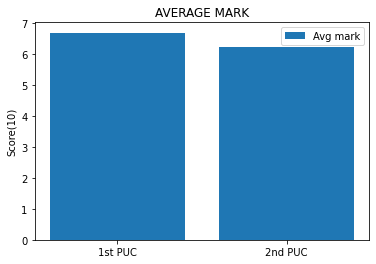

In [68]:
l1=[1,2]
plt.xticks(l1,["1st PUC","2nd PUC"])
plt.ylabel("Score(10)")
plt.title("AVERAGE MARK")
plt.bar(l1,df3.groupby("Class")['Score(10)'].mean().values,label="Avg mark")
plt.legend()

In [76]:
pd1=g.get_group('1st PUC')
top_30=pd1.sort_values('Score(10)',ascending=False)[:30]
top_30

,Score(10),Name,Class,Combination
135,10,tejaswininaik,1st PUC,PCMB
98,10,sannidhi,1st PUC,PCMB
50,10,lohithgowda.s,1st PUC,PCM
51,10,grumadhvah,1st PUC,PCM
63,10,danicaaliciamenezes,1st PUC,PCMB
65,10,deekshaspoojary,1st PUC,PCM
95,10,spoorthi,1st PUC,PCMB
91,10,deeksha,1st PUC,PCMB
155,10,seiashibu,1st PUC,PCMB
110,10,yashsaanvi.r,1st PUC,PCMB


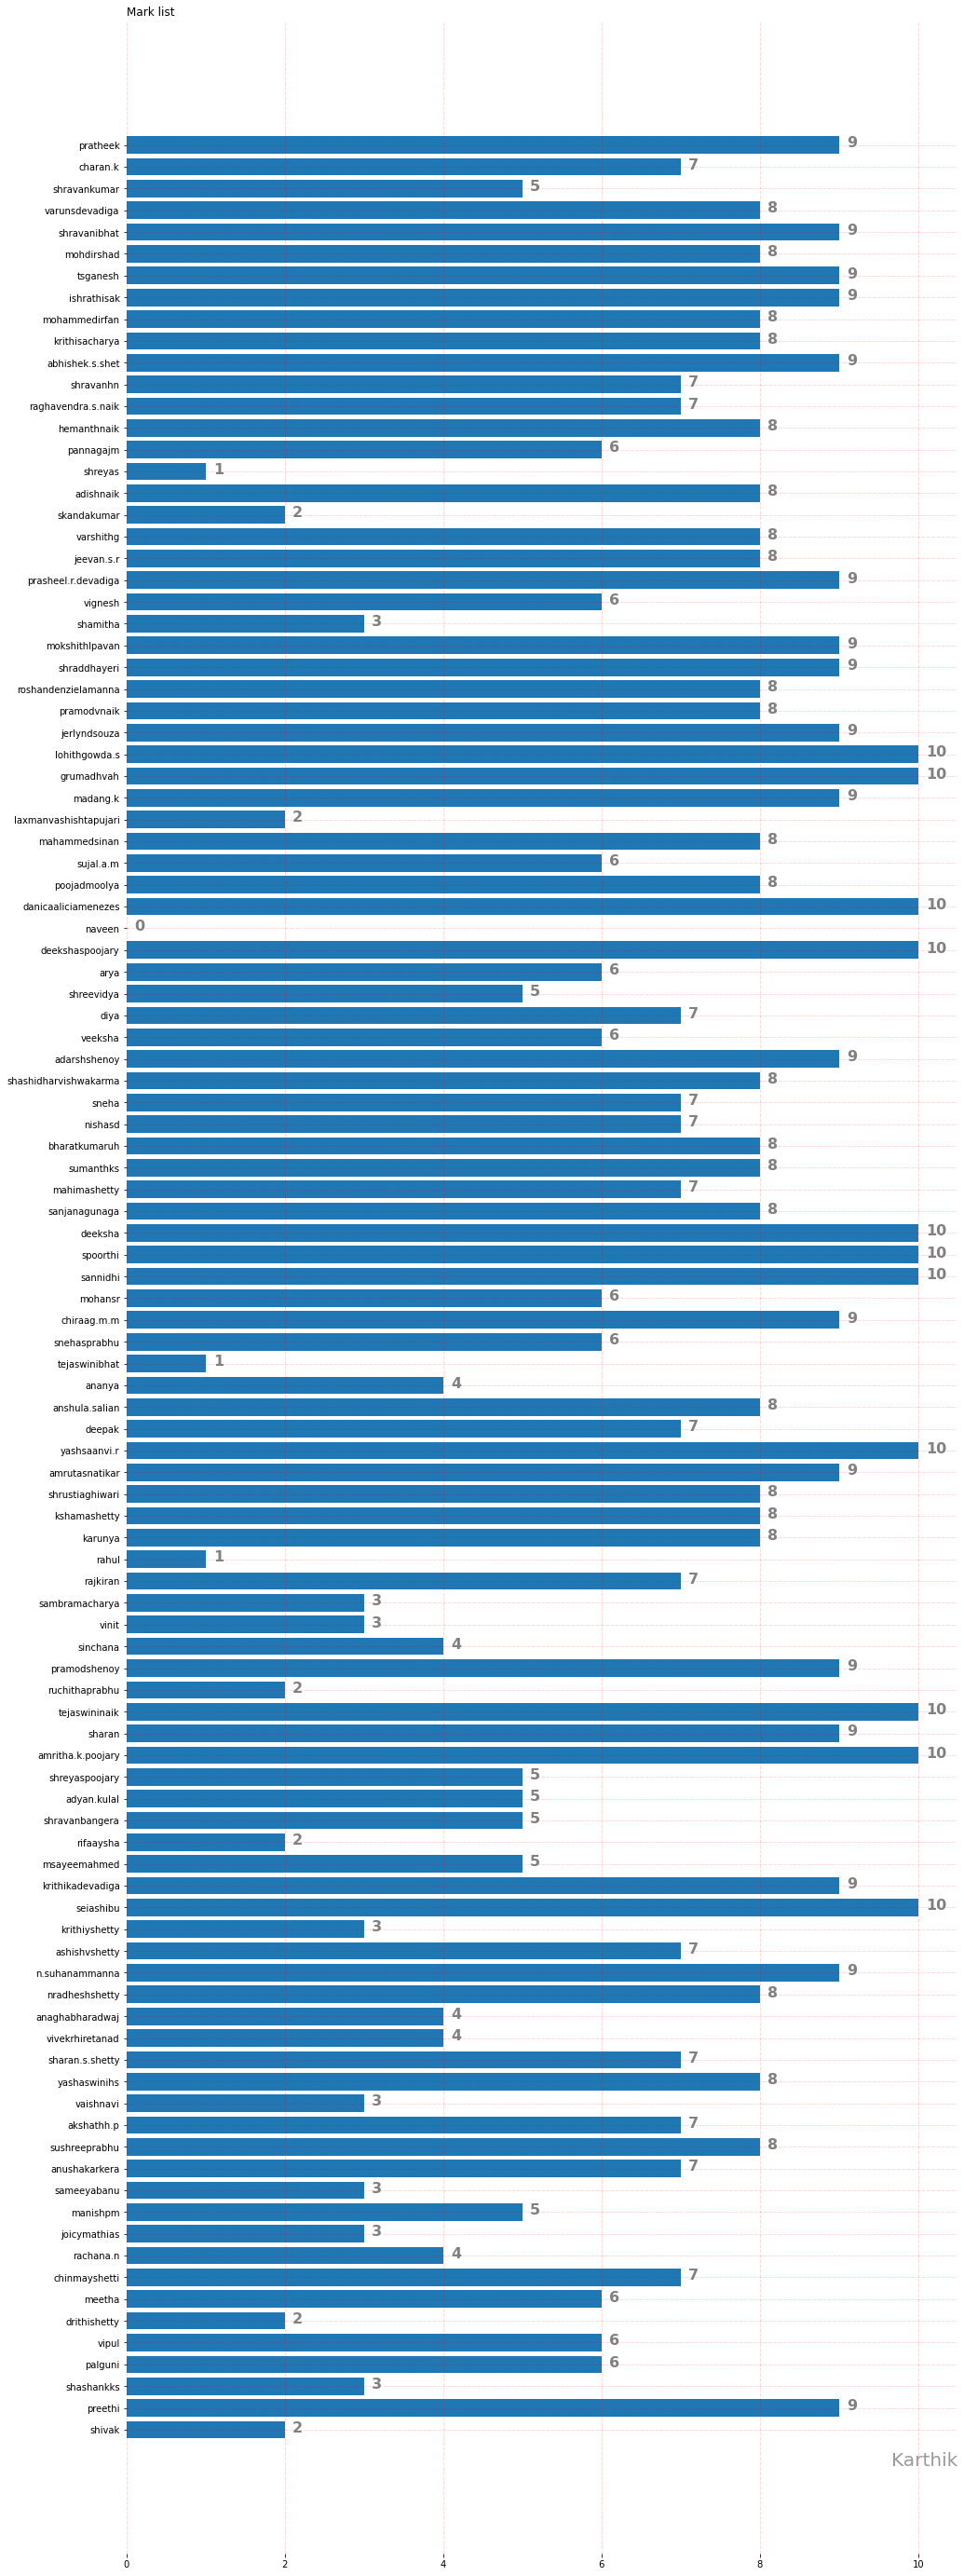

In [80]:
pd1=g.get_group('1st PUC')
figu,ax=plt.subplots(figsize =(16,50))
ax.barh(pd1["Name"],pd1["Score(10)"])

for s in ["top",'bottom','left','right']:
    ax.spines[s].set_visible(False)
    
ax.grid(b=True,color="red",linestyle="-.",linewidth=0.5,alpha=0.3)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.1,i.get_y()+0.5,str(i.get_width()),fontsize=16,fontweight="bold",color="grey")
    
ax.set_title("Mark list",loc="left")
figu.text(0.9,0.15,"Karthik",fontsize=20,color="grey",ha="right",va="bottom",alpha=0.8)   
plt.show()
             